In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "PER")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "VER")  & (race_laps['IsAccurate']==True)) ] 

In [ ]:
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)
driver1 = "PER"
driver2 = "VER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 11]

race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 1]

race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 20]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 20]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 21]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 21]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 45]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 45]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 46]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 46]


In [87]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# VER - PER
# Se ho un valore minore di 0 => VER ha fatto un miglio tempo di PER => istogramma negativo

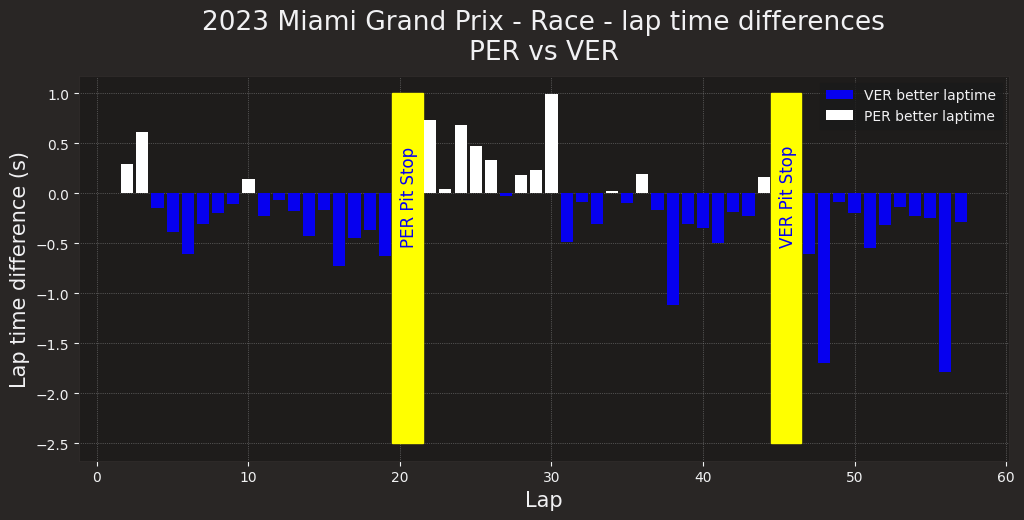

In [88]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0)
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
ax = plt.gca()
ax.add_patch(Rectangle((44.5, -2.5), 2, 3.5, color='yellow'))
ax.add_patch(Rectangle((19.5, -2.5), 2, 3.5, color='yellow'))
ax.text(45, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90, fontsize=12)
ax.text(20, -0.5, "PER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90, fontsize=12)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label="VER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = "white", width=0.8, label = "PER better laptime")
plt.legend()

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "ALO")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "VER")  & (race_laps['IsAccurate']==True)) ] 

In [ ]:
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)
driver1 = "ALO"
driver2 = "VER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 14]

race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 1]

race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 24]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 24]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 25]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 25]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 45]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 45]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 46]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 46]


In [91]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# VER - ALO
# Se ho un valore minore di 0 => VER ha fatto un miglio tempo di ALO => istogramma negativo

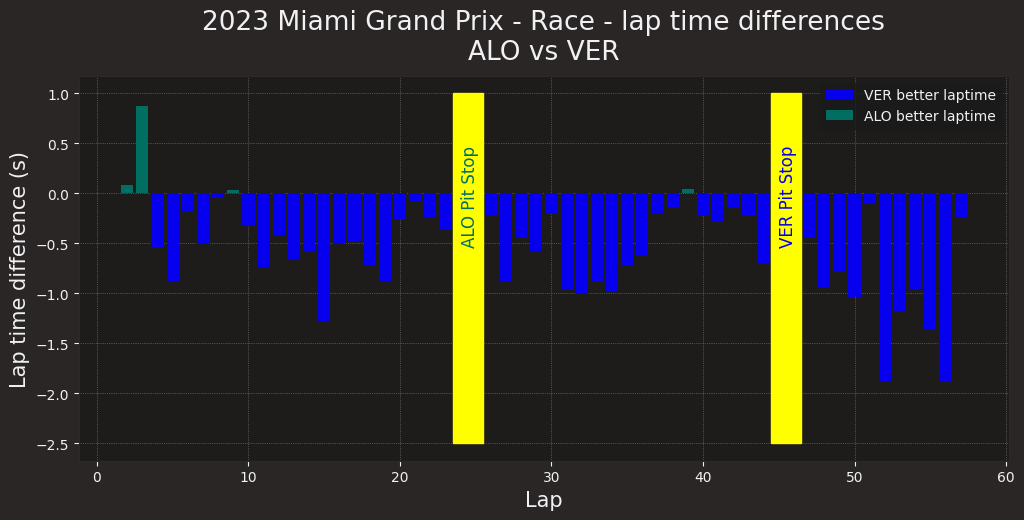

In [92]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0) 
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
ax = plt.gca()
ax.add_patch(Rectangle((44.5, -2.5), 2, 3.5, color='yellow'))
ax.add_patch(Rectangle((23.5, -2.5), 2, 3.5, color='yellow'))
ax.text(45, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90, fontsize=12)
ax.text(24, -0.5, "ALO Pit Stop", color=ff1.plotting.team_color("Aston Martin"), rotation=90, fontsize=12)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label="VER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Aston Martin"), width=0.8, label = "ALO better laptime")
plt.legend()

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "SAI")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "VER")  & (race_laps['IsAccurate']==True)) ] 

In [ ]:
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)
driver1 = "SAI"
driver2 = "VER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 55]

race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 1]

race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 18]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 18]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 19]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 19]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 45]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 45]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 46]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 46]


In [95]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# VER - SAI
# Se ho un valore minore di 0 => VER ha fatto un miglio tempo di SAI => istogramma negativo

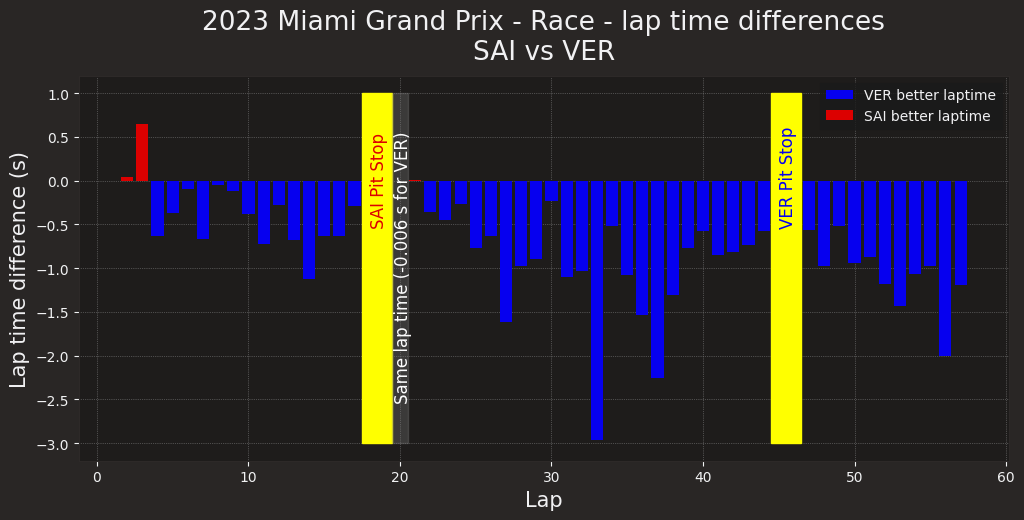

In [96]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0) 
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
ax = plt.gca()
ax.add_patch(Rectangle((44.5, -3), 2, 4, color='yellow'))
ax.add_patch(Rectangle((17.5, -3), 2, 4, color='yellow'))
ax.add_patch(Rectangle((19.5, -3), 1, 4, color='grey', alpha=0.3))
ax.text(45, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90, fontsize=12)
ax.text(18, -0.5, "SAI Pit Stop", color=ff1.plotting.team_color("Ferrari"), rotation=90, fontsize=12)
ax.text(19.6, -2.5, "Same lap time (-0.006 s for VER)", color="white", rotation=90, fontsize=12)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label="VER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Ferrari"), width=0.8, label = "SAI better laptime")
plt.legend()

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Miami') 
race = ff1.get_session(2023, 'Miami', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "RUS")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "VER")  & (race_laps['IsAccurate']==True)) ] 

race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)
driver1 = "RUS"
driver2 = "VER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 63]

race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 1]

race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?

In [12]:
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 17]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 17]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 18]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 18]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 45]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 45]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 46]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 46]


In [14]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))


dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))
del dict_time_driver2[34] # A RUS manca il giro 34 (probabile dato mancante) => lo tolgo anche a VER
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# VER - RUS
# Se ho un valore minore di 0 => VER ha fatto un miglio tempo di RUS => istogramma negativo

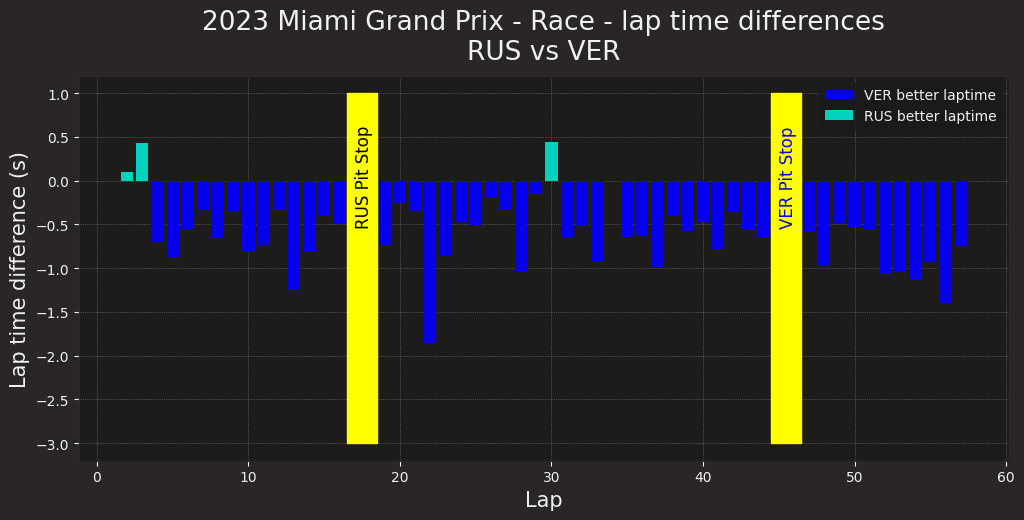

In [18]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0) 
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
ax = plt.gca()
ax.add_patch(Rectangle((44.5, -3), 2, 4, color='yellow'))
ax.add_patch(Rectangle((16.5, -3), 2, 4, color='yellow'))
ax.text(45, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90, fontsize=12)
ax.text(17, -0.5, "RUS Pit Stop", color="black", rotation=90, fontsize=12)
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label="VER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Mercedes"), width=0.8, label = "RUS better laptime")
plt.legend()